In [178]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, ConfusionMatrixDisplay, confusion_matrix
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation, RandomZoom


In [179]:
# Extract data
X = np.load('Xtrain_Classification_Part1.npy')
y = np.load('Ytrain_Classification_Part1.npy')

X_train, X_validate, train_labels, test_labels = train_test_split(X,y)


In [180]:
class_names = ['male', 'female']

# Reshape to 50x50 pixel images
pixels = 50
train_images = []
test_images = []

for image in X_train:
    train_images.append(image.reshape(pixels, pixels))

for image in X_validate:
    test_images.append(image.reshape(pixels, pixels))

train_images = np.array(train_images)
test_images = np.array(test_images)

In [181]:
# Normalizing
train_images = train_images / 255.0
test_images = test_images / 255.0

X_train = X_train / 255.0
X_validate = X_validate / 255.0

In [182]:
# Data augmentation

data_augmentation = tf.keras.Sequential([
  RandomFlip("horizontal"),
  RandomRotation(0.2),
  RandomZoom(0.1),
])



In [183]:
# Building CNN Model
"""
model = keras.Sequential()
model.add(Conv2D(32, (3,3), padding='same', activation='relu',
                input_shape=(50, 50,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (5,5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

model.summary()
"""
model = keras.Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(50, 50, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation="softmax"))

In [184]:
model.compile(  optimizer='adam',
                loss = 'sparse_categorical_crossentropy', #'binary_crossentropy',
                metrics = ['accuracy'])

In [185]:
# Train model
train_images = np.reshape(train_images, (len(train_images), 50, 50, 1))
test_images = np.reshape(test_images, (len(test_images),50, 50, 1))
history = model.fit(train_images, train_labels, validation_data = (test_images, test_labels), epochs = 10)

Epoch 1/10
152/152 [==============================] - 19s 126ms/step - loss: 0.5914 - accuracy: 0.6752 - val_loss: 0.5003 - val_accuracy: 0.7676
Epoch 2/10
152/152 [==============================] - 18s 119ms/step - loss: 0.4524 - accuracy: 0.7918 - val_loss: 0.3980 - val_accuracy: 0.8257
Epoch 3/10
152/152 [==============================] - 18s 121ms/step - loss: 0.3802 - accuracy: 0.8316 - val_loss: 0.3486 - val_accuracy: 0.8412
Epoch 4/10
152/152 [==============================] - 18s 121ms/step - loss: 0.3511 - accuracy: 0.8508 - val_loss: 0.3125 - val_accuracy: 0.8622
Epoch 5/10
152/152 [==============================] - 17s 114ms/step - loss: 0.3124 - accuracy: 0.8679 - val_loss: 0.3028 - val_accuracy: 0.8684
Epoch 6/10
152/152 [==============================] - 17s 111ms/step - loss: 0.2970 - accuracy: 0.8722 - val_loss: 0.2910 - val_accuracy: 0.8684
Epoch 7/10
152/152 [==============================] - 17s 111ms/step - loss: 0.2771 - accuracy: 0.8866 - val_loss: 0.3155 - val_ac

In [186]:
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 50, 50, 32)        320       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 12, 12, 64)      

In [187]:
# Accuracy
test_images = test_images.reshape(-1, 50, 50, 1)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

51/51 [==============================] - 1s 25ms/step - loss: 0.2852 - accuracy: 0.8832
Test accuracy: 0.8831891417503357


In [188]:
predictions = model.predict(test_images) #test_images
predictions

array([[9.9464536e-01, 5.3547160e-03],
       [5.9544138e-05, 9.9994040e-01],
       [9.9516797e-01, 4.8320806e-03],
       ...,
       [3.4866814e-02, 9.6513325e-01],
       [5.1407134e-03, 9.9485934e-01],
       [1.5532641e-03, 9.9844676e-01]], dtype=float32)

In [189]:
# Turn predictions into labels
y_predicted = []

for i in predictions:
    if i[0]> i[1]:
        y_predicted.append(0)
    else:
        y_predicted.append(1)

y_predicted = np.array(y_predicted)
print(y_predicted)

[0 1 0 ... 1 1 1]


BACC = 87.44136507104807


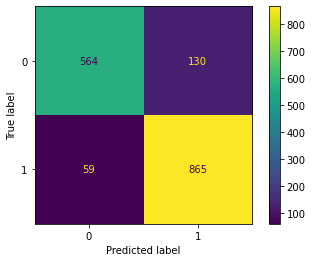

In [190]:
bacc = balanced_accuracy_score(test_labels, y_predicted)

cm = confusion_matrix(test_labels, y_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
print(f"BACC = {bacc * 100}")

In [191]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                            100*np.max(predictions_array),
                                            class_names[true_label]),
                                            color = color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color = '#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

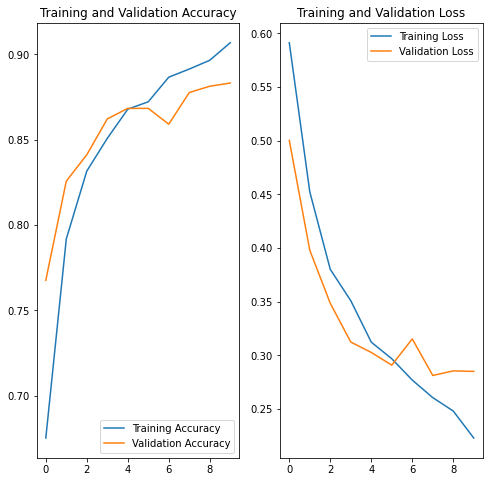

In [192]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

